In [30]:
# Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy import stats


# Store filepath in a variable
file_one = "baseball_1.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
baseball_df = pd.read_csv(file_one, encoding="ISO-8859-1")

# Show just the header
baseball_df.head()


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4,11,12,13,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,RA,Attendance,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current
0,1.0,1.0,2016.0,Arizona Diamondbacks,NL West,162.0,69.0,93.0,0.0,0.426,...,890.0,2036216.0,26.7,26.4,50.0,29.0,J.Segura,5.7,C.Hale (69-93),Arizona Diamondbacks
1,2.0,2.0,2015.0,Arizona Diamondbacks,NL West,162.0,79.0,83.0,0.0,0.488,...,713.0,2080145.0,26.6,27.1,50.0,27.0,P.Goldschmidt,8.8,C.Hale (79-83),Arizona Diamondbacks
2,3.0,3.0,2014.0,Arizona Diamondbacks,NL West,162.0,64.0,98.0,0.0,0.395,...,742.0,2073730.0,27.6,28.0,52.0,25.0,P.Goldschmidt,4.5,K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks
3,4.0,4.0,2013.0,Arizona Diamondbacks,NL West,162.0,81.0,81.0,0.0,0.500,...,695.0,2134895.0,28.1,27.6,44.0,23.0,P.Goldschmidt,7.1,K.Gibson (81-81),Arizona Diamondbacks
4,5.0,5.0,2012.0,Arizona Diamondbacks,NL West,162.0,81.0,81.0,0.0,0.500,...,688.0,2177617.0,28.3,27.4,48.0,23.0,A.Hill,5.0,K.Gibson (81-81),Arizona Diamondbacks


In [53]:
baseball_df.dropna(inplace=True)


In [54]:
baseball_df.tail()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy,Attendance
308,2507.0,1.0,2016.0,Toronto Blue Jays,AL East,162.0,89.0,73.0,0.0,0.549,...,30.1,29.8,38.0,29.0,J.Donaldson,7.4,J.Gibbons (89-73),Toronto Blue Jays,1,3392099.0
309,2508.0,2.0,2015.0,Toronto Blue Jays,AL East,162.0,93.0,69.0,0.0,0.574,...,29.5,29.2,52.0,28.0,J.Donaldson,8.8,J.Gibbons (93-69),Toronto Blue Jays,1,2794891.0
319,2547.0,1.0,2016.0,Washington Nationals,NL East,162.0,95.0,67.0,0.0,0.586,...,28.8,29.1,43.0,24.0,M.Scherzer,6.3,D.Baker (95-67),Washington Nationals,1,2481938.0
321,2549.0,3.0,2014.0,Washington Nationals,NL East,162.0,96.0,66.0,0.0,0.593,...,28.8,28.3,40.0,18.0,A.Rendon,6.6,M.Williams (96-66),Washington Nationals,1,2579389.0
323,2551.0,5.0,2012.0,Washington Nationals,NL East,162.0,98.0,64.0,0.0,0.605,...,27.2,27.0,43.0,19.0,J.Zimmermann,5.3,D.Johnson (98-64),Washington Nationals,0,2370794.0


In [55]:
war_avg_df = baseball_df["War"].mean()
war_avg_df

6.788775510204081

In [56]:
baseball_df['War_Dummy']=baseball_df['War'].apply(lambda x: 1 if x >= 6 else 0)
baseball_df.tail()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy,Attendance
308,2507.0,1.0,2016.0,Toronto Blue Jays,AL East,162.0,89.0,73.0,0.0,0.549,...,30.1,29.8,38.0,29.0,J.Donaldson,7.4,J.Gibbons (89-73),Toronto Blue Jays,1,3392099.0
309,2508.0,2.0,2015.0,Toronto Blue Jays,AL East,162.0,93.0,69.0,0.0,0.574,...,29.5,29.2,52.0,28.0,J.Donaldson,8.8,J.Gibbons (93-69),Toronto Blue Jays,1,2794891.0
319,2547.0,1.0,2016.0,Washington Nationals,NL East,162.0,95.0,67.0,0.0,0.586,...,28.8,29.1,43.0,24.0,M.Scherzer,6.3,D.Baker (95-67),Washington Nationals,1,2481938.0
321,2549.0,3.0,2014.0,Washington Nationals,NL East,162.0,96.0,66.0,0.0,0.593,...,28.8,28.3,40.0,18.0,A.Rendon,6.6,M.Williams (96-66),Washington Nationals,1,2579389.0
323,2551.0,5.0,2012.0,Washington Nationals,NL East,162.0,98.0,64.0,0.0,0.605,...,27.2,27.0,43.0,19.0,J.Zimmermann,5.3,D.Johnson (98-64),Washington Nationals,0,2370794.0


In [ ]:
baseball_df['War_Dummy']=baseball_df['War'].apply(lambda x: 1 if x >= 6 else 0)

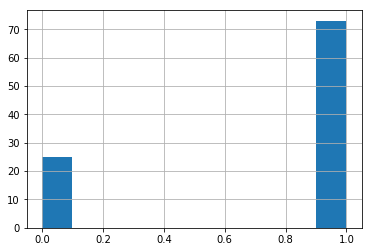

Index(['Unnamed: 0', 'Rk', 'Year', 'Tm', 'Lg', 'G', 'W', 'L', 'Ties', 'W.L.',
       'pythW.L.', 'Finish', 'GB', 'Playoffs', 'R', 'RA', ' Attendance ',
       'BatAge', 'PAge', 'X.Bat', 'X.P', 'Top.Player', 'War', 'Managers',
       'current', 'War_Dummy', 'Attendance'],
      dtype='object')

In [57]:
baseball_df["War_Dummy"].hist()
pl.show()

baseball_df.keys()

In [58]:
#pd.crosstab(baseball_df['Attendance'], baseball_df['War_Dummy'], rownames=['Attendance'])

In [59]:
dummy_ranks = pd.get_dummies(baseball_df['War_Dummy'], prefix='War_Dummy')
dummy_ranks.head()

,War_Dummy_0,War_Dummy_1
5,0,1
9,1,0
14,0,1
15,0,1
17,0,1


In [60]:
baseball_df['Attendance']=pd.to_numeric(baseball_df[' Attendance '])

In [8]:
# Grab violent crime rates
violent_crime_rate = crime_data.iloc[:, 3]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    year, violent_crime_rate)
vc_fit = vc_slope * year + vc_int

NameError: name 'crime_data' is not defined

In [124]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
War_stat = baseball_df["War"]
Attendance = baseball_df["Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(Attendance, War_stat)
W_fit = W_slope * Attendance + W_int

In [62]:
%matplotlib inline

In [63]:
baseball_df.dtypes


Unnamed: 0      float64
Rk              float64
Year            float64
Tm               object
Lg               object
G               float64
W               float64
L               float64
Ties            float64
W.L.            float64
pythW.L.        float64
Finish           object
GB               object
Playoffs         object
R               float64
RA              float64
 Attendance     float64
BatAge          float64
PAge            float64
X.Bat           float64
X.P             float64
Top.Player       object
War             float64
Managers         object
current          object
War_Dummy         int64
Attendance      float64
dtype: object

In [ ]:
# Grab violent crime rates
violent_crime_rate = crime_data.iloc[:, 3]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    year, violent_crime_rate)
vc_fit = vc_slope * year + vc_int
do one yeat at atime , dummy nat vs. ALmer league, discrete random variable new = 0, 1year old =1

In [79]:
#grouped_year_team = pd.DataFrame(baseball_df.groupby(df_all.index.year).sum())
groupedby_baseball = baseball_df.groupby(["Tm", "Year"])
groupedby_baseball

In [85]:
teamgp_df = baseball_df.groupby(["Tm"])

In [87]:
teamgp_df.head()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy,Attendance
5,6.0,6.0,2011.0,Arizona Diamondbacks,NL West,162.0,94.0,68.0,0.0,0.580,...,28.2,27.4,51.0,25.0,J.Upton,6.1,K.Gibson (94-68),Arizona Diamondbacks,1,2105432.0
9,10.0,10.0,2007.0,Arizona Diamondbacks,NL West,162.0,90.0,72.0,0.0,0.556,...,26.6,28.2,47.0,26.0,B.Webb,5.9,B.Melvin (90-72),Arizona Diamondbacks,0,2325249.0
14,23.0,4.0,2013.0,Atlanta Braves,NL East,162.0,96.0,66.0,0.0,0.593,...,26.8,27.2,44.0,21.0,A.Simmons,7.0,F.Gonzalez (96-66),Atlanta Braves,1,2548679.0
15,24.0,5.0,2012.0,Atlanta Braves,NL East,162.0,94.0,68.0,0.0,0.580,...,28.5,27.6,41.0,21.0,M.Bourn,6.1,F.Gonzalez (94-68),Atlanta Braves,1,2420171.0
17,26.0,7.0,2010.0,Atlanta Braves,NL East,162.0,91.0,71.0,0.0,0.562,...,28.6,30.1,43.0,21.0,J.Heyward,6.4,B.Cox (91-71),Atlanta Braves,1,2510119.0
22,161.0,1.0,2016.0,Baltimore Orioles,AL East,162.0,89.0,73.0,0.0,0.549,...,28.4,27.9,40.0,27.0,M.Machado,6.7,B.Showalter (89-73),Baltimore Orioles,1,2172344.0
24,163.0,3.0,2014.0,Baltimore Orioles,AL East,162.0,96.0,66.0,0.0,0.593,...,28.3,27.7,44.0,20.0,S.Pearce,5.9,B.Showalter (96-66),Baltimore Orioles,0,2464473.0
26,165.0,5.0,2012.0,Baltimore Orioles,AL East,162.0,93.0,69.0,0.0,0.574,...,28.0,27.6,52.0,26.0,A.Jones,3.8,B.Showalter (93-69),Baltimore Orioles,0,2102240.0
33,277.0,1.0,2016.0,Boston Red Sox,AL East,162.0,93.0,69.0,0.0,0.574,...,28.6,29.0,43.0,25.0,M.Betts,9.6,J.Farrell (93-69),Boston Red Sox,1,2955434.0
36,280.0,4.0,2013.0,Boston Red Sox,AL East,162.0,97.0,65.0,0.0,0.599,...,29.7,30.2,48.0,26.0,D.Pedroia,6.3,J.Farrell (97-65),Boston Red Sox,1,2833333.0


In [159]:
# Extract item Data
specific_bball = baseball_df.loc[:,["Tm", "Attendance", "Lg", "War", "W"]]

# Perform basic calculations
avg_attendance = specific_bball.groupby(["Tm", "Lg"]).mean()["Attendance"].rename("Average_Attendance")
avg_war = specific_bball.groupby(["Tm", "Lg"]).mean()["War"].rename("Average_WAR")
avg_wins = specific_bball.groupby(["Tm", "Lg"]).mean()["W"].rename("Average_Wins")
#league = specific_bball.groupby(["Tm"]).apply()["Lg"].rename("League")
# Create new DataFrame
item_data_pd = pd.DataFrame({"Average_Attendance": avg_attendance, "Average_WAR": avg_war, "Average_Wins": avg_wins})
item_data_pd.head()

,,Average_Attendance,Average_WAR,Average_Wins
Tm,Lg,,,
Arizona Diamondbacks,NL West,2.215340e+06,6.000000,92.000000
Atlanta Braves,NL East,2.492990e+06,6.500000,93.666667
Baltimore Orioles,AL East,2.246352e+06,5.466667,92.666667
Boston Red Sox,AL East,2.974094e+06,7.200000,95.200000
Chicago Cubs,NL Central,3.176051e+06,7.200000,95.500000


In [173]:
baseball_final = item_data_pd.reset_index(level='Lg')
baseball_final.head()
baseball_final.dtypes

Lg                     object
Average_Attendance    float64
Average_WAR           float64
Average_Wins          float64
dtype: object

In [113]:
column_values = (1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
new_df = item_data_pd.insert(loc=0, column='L', value=column_values)
#df2 = item_data_pd.append(purchase_4, ignore_index=True)

ValueError: cannot insert L, already exists

In [165]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
War_stat = baseball_final["Average_WAR"]
Attendance = baseball_final["Average_Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(Attendance, War_stat)
W_fit = W_slope * Attendance + W_int

In [141]:
W_fit

Tm                             Lg        
Arizona Diamondbacks           NL West       6.413058
Atlanta Braves                 NL East       6.549227
Baltimore Orioles              AL East       6.428268
Boston Red Sox                 AL East       6.785176
Chicago Cubs                   NL Central    6.884222
Chicago White Sox              AL Central    6.552983
Cincinnati Reds                NL Central    6.454562
Cleveland Indians              AL Central    6.215984
Colorado Rockies               NL West       6.562800
Detroit Tigers                 AL Central    6.725946
Houston Astros                 AL West       6.382772
Kansas City Royals             AL Central    6.470525
Los Angeles Angels of Anaheim  AL West       6.925234
Los Angeles Dodgers            NL West       7.165337
Milwaukee Brewers              NL Central    6.832170
Minnesota Twins                AL Central    6.622125
New York Mets                  NL East       6.755195
New York Yankees               AL East  

In [129]:
ax1.set_xlim(min(year), max(year))
ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("Violent Crime Rate")

NameError: name 'ax1' is not defined

In [194]:
baseball_final['League_Dummy']=baseball_final['Lg'].apply(lambda x: 1 if (x == "NL East" or x == "NL West" 
                                                          or x == "NL Central")
                                                          else 0)
                                                          
                                            

In [195]:
baseball_final

,Lg,Average_Attendance,Average_WAR,Average_Wins,League_Dummy
Tm,,,,,
Arizona Diamondbacks,NL West,2.215340e+06,6.000000,92.000000,1
Atlanta Braves,NL East,2.492990e+06,6.500000,93.666667,1
Baltimore Orioles,AL East,2.246352e+06,5.466667,92.666667,0
Boston Red Sox,AL East,2.974094e+06,7.200000,95.200000,0
Chicago Cubs,NL Central,3.176051e+06,7.200000,95.500000,1
Chicago White Sox,AL Central,2.500648e+06,6.400000,89.000000,0
Cincinnati Reds,NL Central,2.299967e+06,6.466667,92.666667,1
Cleveland Indians,AL Central,1.813502e+06,6.200000,94.000000,0
Colorado Rockies,NL West,2.520665e+06,6.650000,91.000000,1


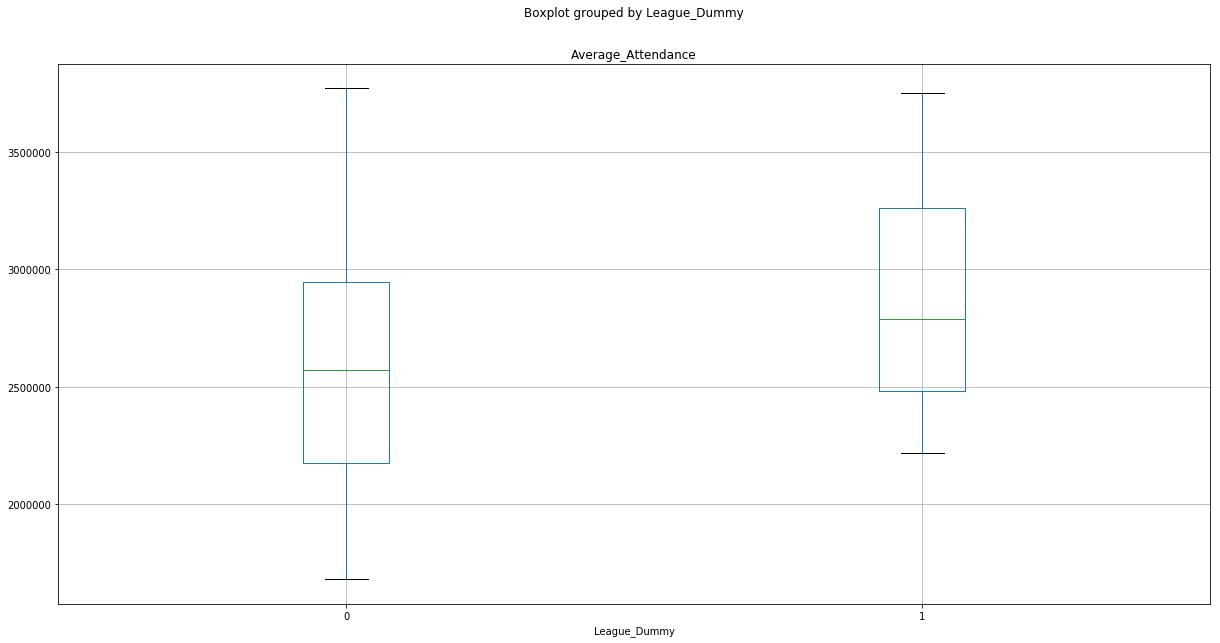

In [196]:
# Create a boxplot to compare means
baseball_final.boxplot("Average_Attendance", by="League_Dummy", figsize=(20, 10))

In [199]:
group1 = baseball_final[baseball_final["League_Dummy"] == 0]["Average_Attendance"]
group2 = baseball_final[baseball_final["League_Dummy"] == 1]["Average_Attendance"]

In [201]:
stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-1.4181435617117339, pvalue=0.1684613696342801)

In [200]:
stats.f_oneway(group1, group2)

F_onewayResult(statistic=2.0111311616244416, pvalue=0.16802408910617839)

In [ ]:
#dummy_ranks = pd.get_dummies(baseball_df['War_Dummy'], prefix='War_Dummy')
#dummy_ranks.head()

Text(-1,0.5,'Attendance')

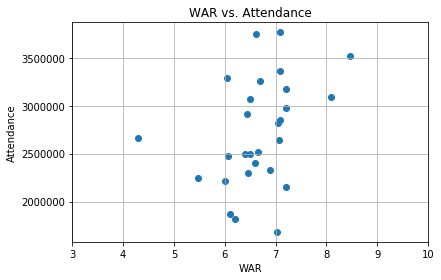

In [203]:
# Build a scatter plot for each data typeitem_data_pd = pd.DataFrame({"Average_Attendance": avg_attendance, "Average_WAR": avg_war, "Average_Wins": avg_wins})
#item_data_pd
plt.scatter(baseball_final["Average_WAR"], Attendance, marker="o")

# Incorporate the other graph properties
plt.title("WAR vs. Attendance")

plt.xlabel("WAR")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot

plt.tight_layout()
plt.ylim(1579118.25, 3870599.4)
plt.xlim(3, 10)
plt.ylabel("Attendance")

Text(-1,0.5,'Attendance')

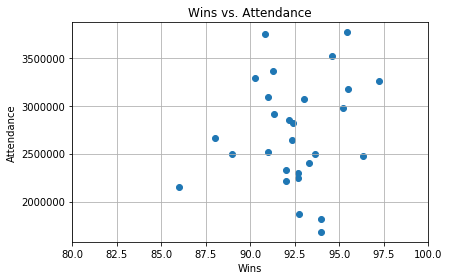

In [202]:
plt.scatter(baseball_final["Average_Wins"], Attendance, marker="o")

# Incorporate the other graph properties
plt.title("Wins vs. Attendance")

plt.xlabel("Wins")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot

plt.tight_layout()
plt.ylim(1579118.25, 3870599.4)
plt.xlim(80, 100)
plt.ylabel("Attendance")

In [209]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
#baseball_final["Average_WAR"]
#Attendance = baseball_final["Average_Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(baseball_final["Average_WAR"], baseball_final["Average_Attendance"])
W_fit = W_slope * Attendance + W_int

In [211]:
print(W_p)

0.06296542397


Text(0,0.5,'Attendance')

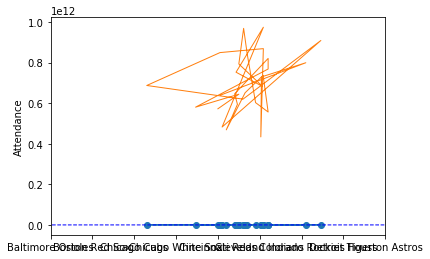

In [213]:
plt.xlim(2, 10)
plt.plot(baseball_final["Average_WAR"], baseball_final["Average_Attendance"], linewidth=1, marker="o")
plt.plot(baseball_final["Average_WAR"], W_fit, baseball_final["Average_Attendance"], "b--", linewidth=1)
plt.ylabel("Attendance")


In [ ]:
print()

In [74]:
#def trendline(Attendance, War_stat, order=1, c='r', alpha=1, Rval=False):
    #"""Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(Attendance, War_stat, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minAttendance = np.min(Attendance)
    maxAttendance = np.max(Attendance)

    xl = np.array([minAttendance, maxAttendance])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(War_stat) / len(War_stat)
    ssreg = np.sum((p(Attendance) - ybar) ** 2)
    sstot = np.sum((War_stat - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxAttendance + 0.2 * minAttendance, 0.8 * np.max(War_stat) + 0.2 * np.min(War_stat),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr
    return trendline

NameError: name 'coeffs' is not defined